# Data exploration

##### read the data

In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\ROG\Downloads\archive (1)\netflix1.csv")
data.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


##### Explore the data

In [2]:
data.info() #gives information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [3]:
data.isnull().sum() #checks if there are any missing values in the data

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [4]:
data.duplicated().sum() #checks if there are any duplicates in the data

0

In [5]:
data.nunique() #gives number of unique values in data

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

In [6]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
data['title'].value_counts() #to count and see which titles were duplicated

title
9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: count, Length: 8787, dtype: int64

In [8]:
data[(data['title']=='9-Feb')|(data['title']=='15-Aug')|(data['title']=='22-Jul')] #show  all the entries with the duplicated titles

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
393,s3997,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
2925,s3963,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
3285,s4523,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


In [9]:
duplicated=data[data['title'].duplicated()]
duplicated

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


In [10]:
def duplicated(data):
    titles=data['title']
    duplicates=[]
    stay=[]
    
    for title in titles:
        if title in stay:
            duplicates.append(title)
        else:
            stay.append(title)
    return duplicates,stay   #function to find all duplicated titles 

In [11]:
repeated_titles,unique_titles=duplicated(data)
print('the repeated titles are:',repeated_titles)
#print('the unique titles are:',unique_titles)

the repeated titles are: ['9-Feb', '22-Jul', '15-Aug']


# Data cleaning

In [12]:
data_unique=data.drop_duplicates(subset='title', keep='first')
data_unique.head()                                            #drop all rows with duplicated titles

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [13]:
data=data_unique[~data_unique.isin(['Not Given']).any(axis=1)]  
data.head()                                                  #create new data set with all rows with 'Not given' values removed

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [14]:
data.shape #new data dimensions

(5913, 10)

In [15]:
data.rename(columns={'date_added':'Date','listed_in':'genre'}, inplace=True)
data

C:\Users\ROG\AppData\Local\Temp\ipykernel_21560\480420968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'date_added':'Date','listed_in':'genre'}, inplace=True)


,show_id,type,title,director,country,Date,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
6565,s3351,Movie,True: Grabbleapple Harvest,"Mark Thornton, Todd Kauffman",Canada,11/1/2019,2019,TV-Y,24 min,Children & Family Movies
6566,s3509,Movie,True: Tricky Treat Day,"Mark Thornton, Todd Kauffman",Canada,9/20/2019,2019,TV-Y,24 min,Children & Family Movies
6567,s3554,TV Show,True and the Rainbow Kingdom,"Mark Thornton, Todd Kauffman",United States,8/30/2019,2019,TV-Y,3 Seasons,Kids' TV
6568,s4241,Movie,Sam Kinison: The Scream Continues,Walter C. Miller,United States,12/31/2018,2016,TV-MA,29 min,Documentaries


In [16]:
data['Date']=pd.to_datetime(data['Date'])

C:\Users\ROG\AppData\Local\Temp\ipykernel_21560\1428478067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date']=pd.to_datetime(data['Date'])


In [17]:
data['Date']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-22
4      2021-09-24
          ...    
6565   2019-11-01
6566   2019-09-20
6567   2019-08-30
6568   2018-12-31
6569   2021-02-12
Name: Date, Length: 5913, dtype: datetime64[ns]

In [18]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
Date            datetime64[ns]
release_year             int64
rating                  object
duration                object
genre                   object
dtype: object

In [19]:
data.head()

,show_id,type,title,director,country,Date,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [20]:
data.describe()

,Date,release_year
count,5913,5913.000000
mean,2019-04-25 04:13:01.735159808,2013.012853
min,2008-01-01 00:00:00,1942.000000
25%,2018-03-30 00:00:00,2012.000000
50%,2019-06-13 00:00:00,2016.000000
75%,2020-07-03 00:00:00,2018.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,9.694880


# Data visualization

##### TYPE

In [21]:
data.groupby('type').type.count()

type
Movie      5694
TV Show     219
Name: type, dtype: int64

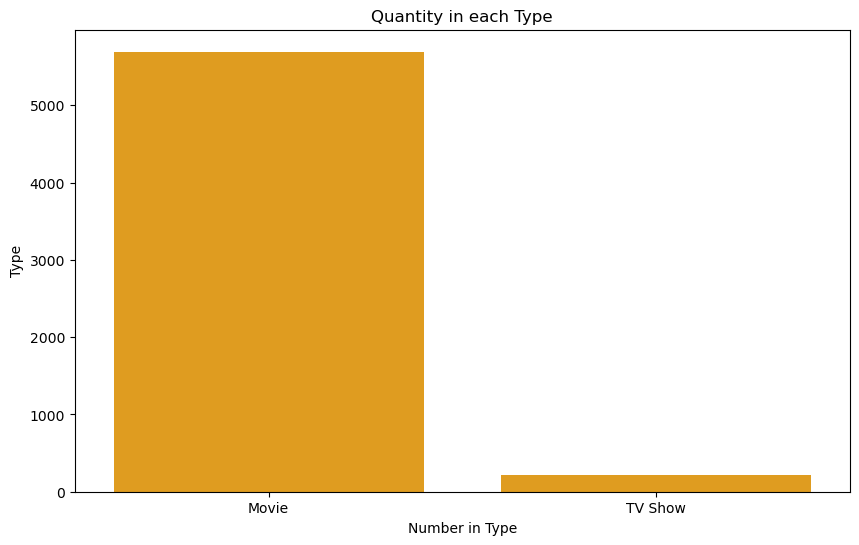

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.xlabel('Number in Type',fontsize=10)
plt.ylabel('Type')
plt.title('Quantity in each Type')
sns.countplot(x=data['type'], color='orange')
plt.show()

##### Country

In [23]:
top_countries=data['country'].value_counts().reset_index().sort_values(by='count',ascending= False).head(10)
top_countries

,country,count
0,United States,2401
1,India,974
2,United Kingdom,406
3,Canada,189
4,France,156
5,Spain,140
6,Egypt,107
7,Nigeria,100
8,Japan,96
9,Mexico,93


Text(0, 0.5, 'Number of movies')

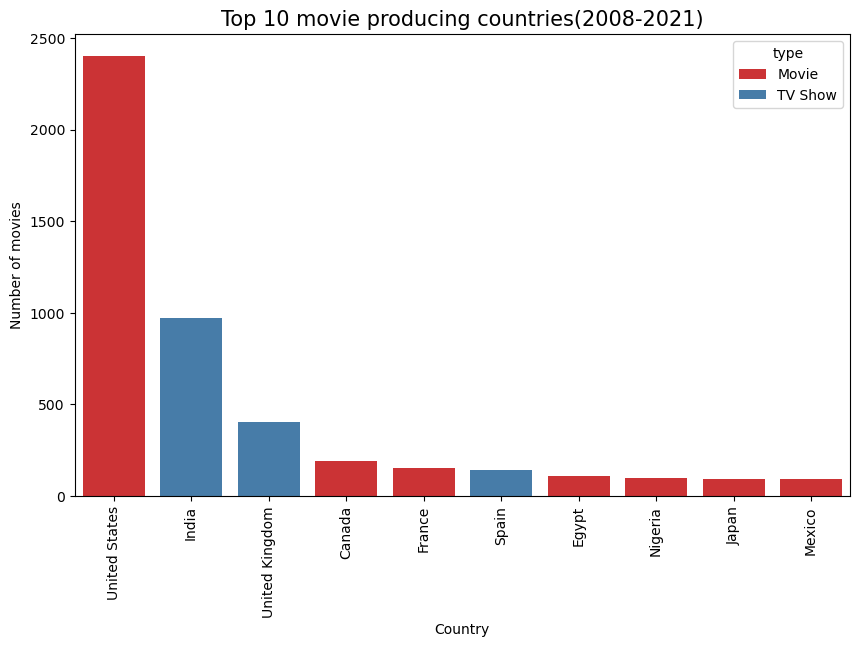

In [24]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90, fontsize=10)  # Rotate x labels for better visibility
sns.barplot(x=top_countries['country'],y=top_countries['count'], hue=data['type'], palette='Set1')
plt.title('Top 10 movie producing countries(2008-2021)', fontsize=15)
plt.xlabel('Country')
plt.ylabel('Number of movies')

##### Rating

In [25]:
rating = data.groupby(['rating'])['rating'].value_counts().reset_index()
rating

,rating,count
0,G,41
1,NC-17,2
2,NR,75
3,PG,281
4,PG-13,486
5,R,786
6,TV-14,1367
7,TV-G,112
8,TV-MA,2029
9,TV-PG,521


(array([], dtype=float64), [])

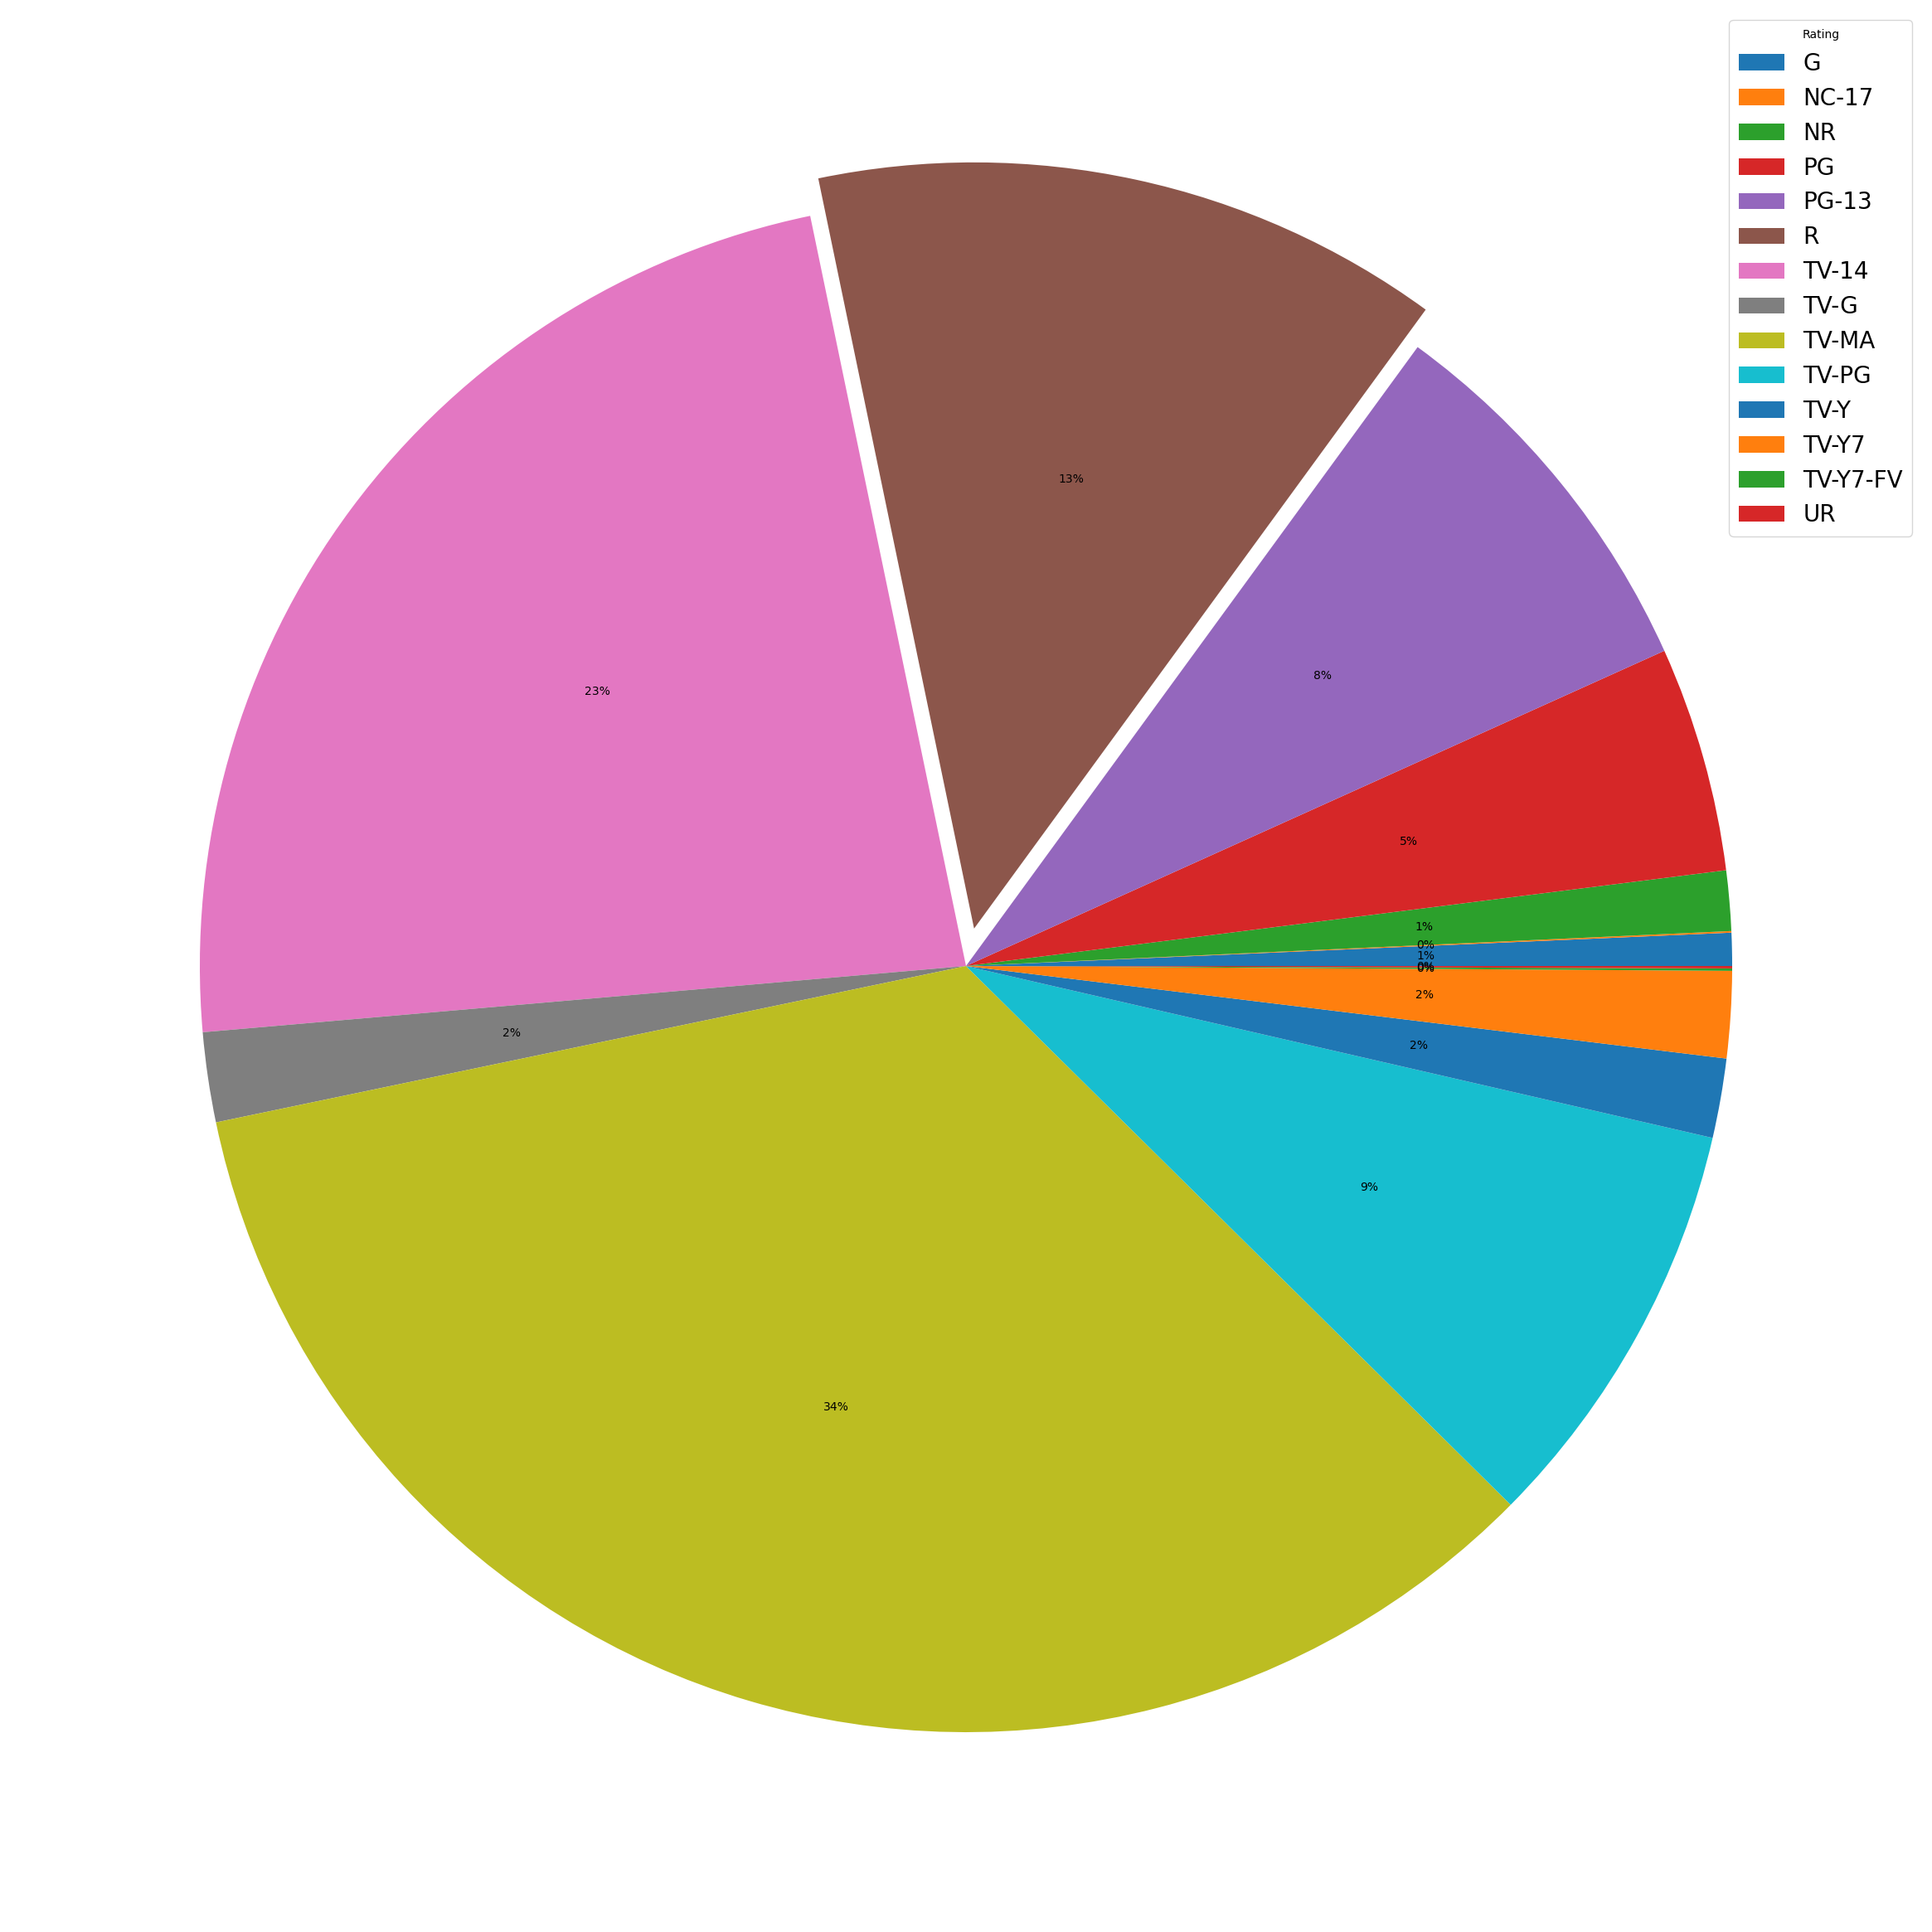

In [26]:
plt.figure(figsize=(30,30))
plt.pie(rating['count'], autopct='%1.f%%', startangle=360, explode=[0,0,0,0,0,0.05,0,0,0,0,0,0,0,0])
plt.legend(rating['rating'], title='Rating', fontsize=20)
plt.xticks(rotation=90)


##### Release year trend

In [27]:
year_trend=data.groupby('release_year').release_year.value_counts().reset_index().sort_values(by='count',ascending=False).head(10)
year_trend

,release_year,count
68,2017,744
69,2018,729
67,2016,645
70,2019,597
71,2020,503
66,2015,386
65,2014,262
64,2013,223
72,2021,219
63,2012,175


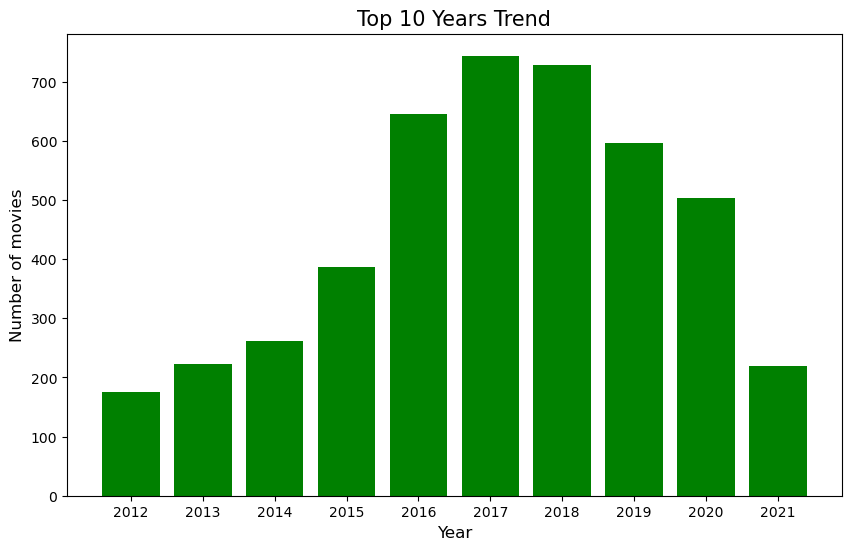

In [28]:
import numpy as np

plt.figure(figsize=(10,6))
plt.bar(year_trend['release_year'],year_trend['count'], color='green')
plt.xticks(np.arange(2012, 2022, 1))
plt.title('Top 10 Years Trend', fontsize=15, color='black')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of movies', fontsize=12)
plt.show()



In [29]:
print('The number of unique genres is',data.genre.nunique())

The number of unique genres is 349


##### Genre Composition

In [30]:
Genre=data.groupby('genre').genre.value_counts().reset_index().sort_values(by='count',ascending=False)
Genre.head()

,genre,count
255,"Dramas, International Movies",346
215,Documentaries,328
338,Stand-Up Comedy,296
162,"Comedies, Dramas, International Movies",262
248,"Dramas, Independent Movies, International Movies",245


In [31]:
Genre['count'].sum()

5913

In [32]:
with_drama=Genre[Genre['genre'].str.contains('Drama')]
with_drama.head(2)


,genre,count
255,"Dramas, International Movies",346
162,"Comedies, Dramas, International Movies",262


In [33]:
a=with_drama['count'].sum()

In [34]:
with_international_movies=Genre[Genre['genre'].str.contains('International Movies')]
with_international_movies.head(2)

,genre,count
255,"Dramas, International Movies",346
162,"Comedies, Dramas, International Movies",262


In [35]:
b=with_international_movies['count'].sum()

In [36]:
with_romantic_movies= Genre[Genre['genre'].str.contains('Romantic Movies')]
with_romantic_movies.head(2)

,genre,count
258,"Dramas, International Movies, Romantic Movies",163
182,"Comedies, International Movies, Romantic Movies",146


In [37]:
c=with_romantic_movies['count'].sum()

In [38]:
with_documentries= Genre[Genre['genre'].str.contains('Documentaries')]
with_documentries.head(2)

,genre,count
215,Documentaries,328
222,"Documentaries, International Movies",161


In [39]:
d=with_documentries['count'].sum()

In [40]:
with_thrillers= Genre[Genre['genre'].str.contains('Thrillers')]
with_thrillers.head(2)

,genre,count
261,"Dramas, International Movies, Thrillers",129
273,"Dramas, Thrillers",80


In [41]:
e=with_thrillers['count'].sum()

In [42]:
with_action_adventure= Genre[Genre['genre'].str.contains('Action & Adventure')]
with_action_adventure.head(2)

,genre,count
0,Action & Adventure,127
38,"Action & Adventure, Dramas, International Movies",113


In [43]:
f=with_action_adventure['count'].sum()

In [44]:
with_comedies= Genre[Genre['genre'].str.contains('Comedies')]
with_comedies.head(2)

,genre,count
162,"Comedies, Dramas, International Movies",262
99,"Children & Family Movies, Comedies",185


In [45]:
g=with_comedies['count'].sum()

In [46]:
with_independent_movies= Genre[Genre['genre'].str.contains('Independent Movies')]
with_independent_movies.head(2)

,genre,count
248,"Dramas, Independent Movies, International Movies",245
161,"Comedies, Dramas, Independent Movies",113


In [47]:
h=with_independent_movies['count'].sum()

Text(0.5, 1.0, 'Genre compositions')

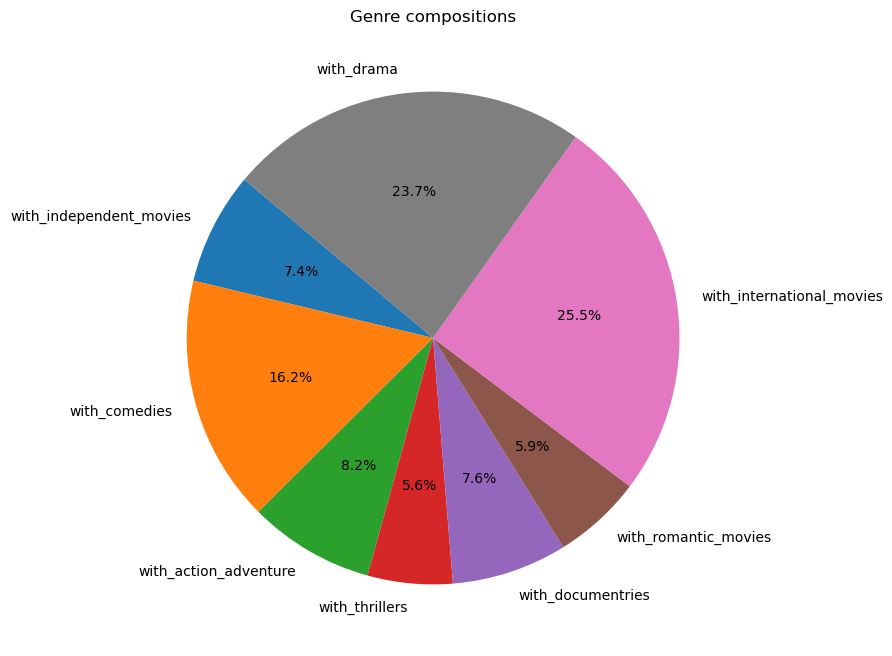

In [48]:
labels=['with_independent_movies','with_comedies','with_action_adventure','with_thrillers','with_documentries','with_romantic_movies','with_international_movies','with_drama'] 
amounts=[h,g,f,e,d,c,b,a]

plt.figure(figsize=(12,8))
plt.pie(amounts,labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Genre compositions')

Movies that fell under international movies, regardless of the genre, were the most produced between 1942 and 2021. and the least were the movies with thriller components.